# Group Activity 4 Elbow Method

In [1]:

from sklearn.cluster import KMeans
# include functions to measure machine learning models' performance
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import pandas as pd

from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer




# TODO determine the best k for k-means
# TODO calculate accuracy for best K
# TODO draw a confusion matrix

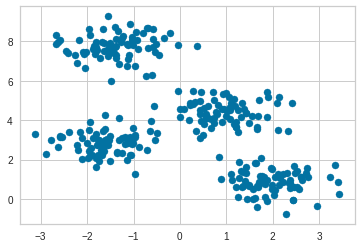

In [2]:

X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)

plt.scatter(X[:, 0], X[:, 1], s=50);



In [3]:
from sklearn.cluster import KMeans
# k = 4
kmeans = KMeans(n_clusters=4, random_state=0)
# inputs of fit function X, without y, 
# because K-means is unsupervised learning
kmeans.fit(X)
y_kmeans = kmeans.predict(X)


clusters = kmeans.fit_predict(X.data)
kmeans.cluster_centers_.shape


(4, 2)

(4, 2)

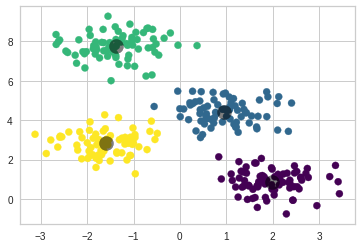

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

# predicted centroids
centers = kmeans.cluster_centers_

plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

kmeans.cluster_centers_.shape

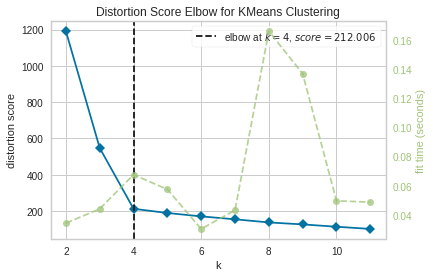

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [5]:
model= KMeans()
visualizer = KElbowVisualizer(model,k=(2,12))

visualizer.fit(X)
visualizer.show()
#plt.xlim([0, 10])
#plt.ylim([0, 10])
#plt.title('Dataset')
#plt.scatter(X[:, 0], X[:, 1], s=50);

In [6]:
print(y_true[:5])

[1 3 0 3 1]


In [7]:
# print(clusters)
# print(clusters.shape)
# prepare our predictions
from scipy.stats import mode

#        create a zero matrix with the same shape
labels = np.zeros_like(clusters)
# print(labels.shape)
# print(labels)
for i in range(4):
    # this is similar to another for loop to check every element of clusters
    # group all the elements of clusters == i, then assign these elements to mask
    mask = (clusters == i)
    #print(mask)
    labels[mask] = mode(y_true[mask])[0]

print(labels[:5])
print(y_true[:5])

[1 3 0 3 1]
[1 3 0 3 1]


<ipython-input-7-77c1f5b789ae>:15: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[mask] = mode(y_true[mask])[0]


In [8]:

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_true, labels)
print(accuracy)

1.0


[[75  0  0  0]
 [ 0 75  0  0]
 [ 0  0 75  0]
 [ 0  0  0 75]]


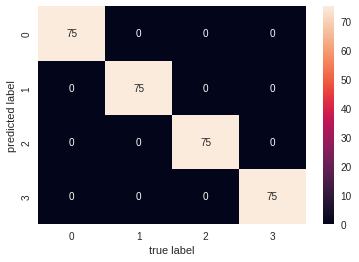

In [9]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_true, labels)
print(mat)

mat_cm = pd.DataFrame(mat,range(4),range(4))
sns.heatmap(mat_cm, annot=True)


plt.xlabel('true label')
plt.ylabel('predicted label');

plt.show()